# How does job access affect the percentage of transit ridership and transportation costs?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tact = pd.read_csv('texas_affordability_census_tract.csv')
tact

,tract,cbsa,blkgrps,population,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,...,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu
0,"""48001950100""","""Palestine, TX""",3.0,4782.0,1784.0,119427.88,65.0,77.0,52.0,30.0,...,1277.0,81.0,252.0,6.0,4035,1047.0,1085.0,785.0,83.0,17.0
1,"""48001950401""","""Palestine, TX""",1.0,5166.0,99.0,4089.55,43.0,50.0,35.0,17.0,...,1119.0,80.0,100.0,5.0,2419,576.0,NaN,576.0,13.0,87.0
2,"""48001950402""","""Palestine, TX""",1.0,6802.0,53.0,17908.21,56.0,66.0,45.0,31.0,...,1063.0,80.0,179.0,3.0,4171,1053.0,NaN,1053.0,9.0,91.0
3,"""48001950500""","""Palestine, TX""",4.0,4587.0,1492.0,5693.29,53.0,62.0,43.0,24.0,...,3118.0,82.0,23.0,53.0,1212,834.0,917.0,373.0,61.0,39.0
4,"""48001950600""","""Palestine, TX""",4.0,6658.0,2236.0,5103.13,55.0,64.0,44.0,25.0,...,3465.0,83.0,24.0,65.0,1174,857.0,933.0,750.0,62.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5248,"""48505950400""","""Zapata, TX""",4.0,5979.0,1745.0,630786.51,68.0,82.0,42.0,37.0,...,660.0,75.0,303.0,3.0,5331,983.0,1147.0,435.0,77.0,23.0
5249,"""48507950100""","""""",1.0,1167.0,404.0,275327.07,80.0,96.0,42.0,27.0,...,493.0,77.0,355.0,4.0,4491,593.0,621.0,474.0,81.0,19.0
5250,"""48507950200""","""""",1.0,1939.0,567.0,145983.56,86.0,102.0,45.0,34.0,...,420.0,76.0,246.0,4.0,3408,751.0,819.0,511.0,78.0,22.0
5251,"""48507950301""","""""",2.0,2129.0,671.0,404217.35,50.0,59.0,27.0,16.0,...,1252.0,79.0,123.0,3.0,5008,351.0,NaN,351.0,45.0,55.0


In [7]:
tact.columns

Index(['tract', 'cbsa', 'blkgrps', 'population', 'households', 'land_acres',
       'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami', 'h_nmi', 't_ami',
       't_80ami', 't_nmi', 'co2_per_hh_local', 'co2_per_acre_local',
       'autos_per_hh_ami', 'autos_per_hh_80ami', 'autos_per_hh_nmi',
       'vmt_per_hh_ami', 'vmt_per_hh_80ami', 'vmt_per_hh_nmi',
       'pct_transit_commuters_ami', 'pct_transit_commuters_80ami',
       'pct_transit_commuters_nmi', 't_cost_ami', 't_cost_80ami', 't_cost_nmi',
       'auto_ownership_cost_ami', 'auto_ownership_cost_80ami',
       'auto_ownership_cost_nmi', 'vmt_cost_ami', 'vmt_cost_80ami',
       'vmt_cost_nmi', 'transit_cost_ami', 'transit_cost_80ami',
       'transit_cost_nmi', 'transit_trips_ami', 'transit_trips_80ami',
       'transit_trips_nmi', 'compact_ndx', 'emp_ovrll_ndx', 'res_density',
       'gross_hh_density', 'hh_gravity', 'frac_sfd', 'emp_gravity', 'emp_ndx',
       'block_size', 'intersection_density', 'avg_block_perimeter_meters',
  

In [16]:
df = tact[['emp_ovrll_ndx', 'pct_transit_commuters_ami', 'pct_transit_commuters_80ami', 'pct_transit_commuters_nmi', 't_cost_ami', 't_cost_80ami', 't_cost_nmi']]
df

,emp_ovrll_ndx,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi
0,0.6,0.0,0.0,0.0,14453.0,12775.0,15374.0
1,1.8,2.0,3.0,2.0,10711.0,9518.0,11796.0
2,1.1,3.0,3.0,2.0,10433.0,9291.0,11490.0
3,4.5,1.0,1.0,0.0,12012.0,10481.0,13064.0
4,3.7,0.0,0.0,0.0,12285.0,10734.0,13340.0
...,...,...,...,...,...,...,...
5248,5.2,2.0,3.0,3.0,13057.0,11983.0,14167.0
5249,0.8,1.0,2.0,2.0,14312.0,13283.0,15711.0
5250,1.1,2.0,2.0,2.0,13807.0,12773.0,15188.0
5251,3.4,2.0,2.0,2.0,11319.0,10380.0,12767.0


In [17]:
df.describe()

,emp_ovrll_ndx,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi
count,5213.000000,5212.000000,5212.000000,5213.000000,5212.000000,5212.000000,5213.000000
mean,4.096566,2.620299,2.514006,2.587761,13022.180737,11585.410591,12780.398043
std,2.272251,3.666839,3.538314,3.639267,1517.436648,1460.845817,1617.609278
min,0.000000,0.000000,0.000000,0.000000,7895.000000,6970.000000,7477.000000
25%,2.100000,0.000000,0.000000,0.000000,12016.250000,10592.750000,11763.000000
50%,4.200000,1.000000,1.000000,1.000000,13092.500000,11642.000000,12843.000000
75%,5.900000,4.000000,4.000000,4.000000,14104.250000,12654.000000,13939.000000
max,9.800000,28.000000,26.000000,27.000000,17974.000000,16733.000000,17632.000000


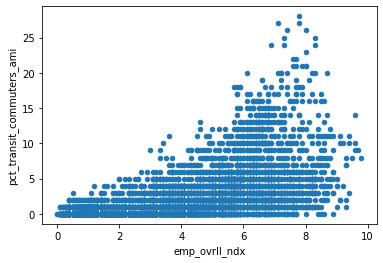

In [18]:
df.plot(kind='scatter', x='emp_ovrll_ndx', y='pct_transit_commuters_ami')

# Compare box plots of % of transit ridership given low job access and high job access

In [25]:
#low job access df
low_job_access = df[df['emp_ovrll_ndx']<=4]
low_job_access.head()

,emp_ovrll_ndx,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi
0,0.6,0.0,0.0,0.0,14453.0,12775.0,15374.0
1,1.8,2.0,3.0,2.0,10711.0,9518.0,11796.0
2,1.1,3.0,3.0,2.0,10433.0,9291.0,11490.0
4,3.7,0.0,0.0,0.0,12285.0,10734.0,13340.0
7,3.6,1.0,1.0,1.0,13786.0,12134.0,14673.0


In [24]:
#high job access df
high_job_access = df[df['emp_ovrll_ndx']>4]
high_job_access.head(3)

,emp_ovrll_ndx,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi
3,4.5,1.0,1.0,0.0,12012.0,10481.0,13064.0
5,4.2,0.0,1.0,0.0,11389.0,9948.0,12534.0
6,4.6,0.0,0.0,0.0,11559.0,10060.0,12650.0


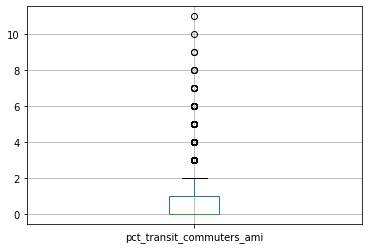

In [28]:
low_job_access.boxplot(column=['pct_transit_commuters_ami'])

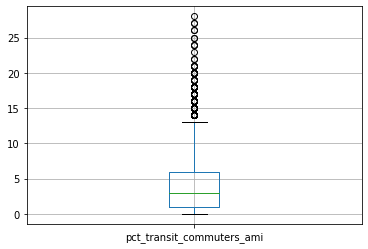

In [31]:
high_job_access.boxplot(column=['pct_transit_commuters_ami'])

## Boxplots are not helpful since the question doesn't deal with categorical data. It looks like scatter plots are the way to go, so relationship between job access and other variables can be seen more clearly.

# As job access (emp_ovrll_ndx) increases, % of transit ridership tends to increase:

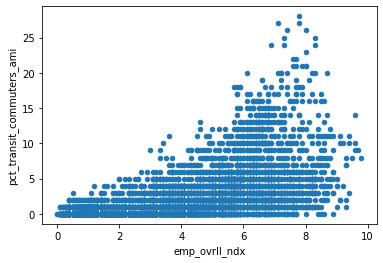

In [34]:
df.plot(kind='scatter', x='emp_ovrll_ndx', y='pct_transit_commuters_ami')

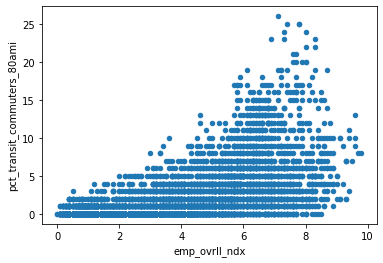

In [35]:
df.plot(kind='scatter', x='emp_ovrll_ndx', y='pct_transit_commuters_80ami')

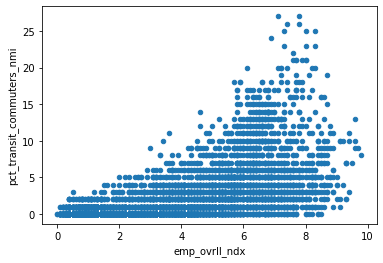

In [36]:
df.plot(kind='scatter', x='emp_ovrll_ndx', y='pct_transit_commuters_nmi')

## Not much of a difference between pct_transit_commuters_ami, pct_transit_commuters_80ami, and pct_transit_commuters_nmi. The trend stays the same.

# As job access (emp_ovrll_ndx) increases, the cost of transportation decreases:

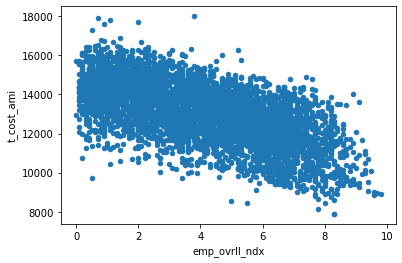

In [37]:
df.plot(kind='scatter', x='emp_ovrll_ndx', y='t_cost_ami')

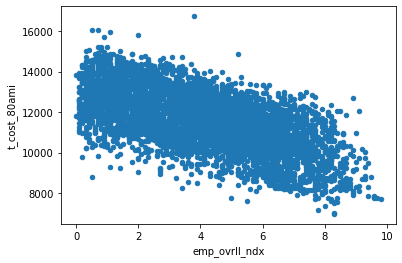

In [38]:
df.plot(kind='scatter', x='emp_ovrll_ndx', y='t_cost_80ami')

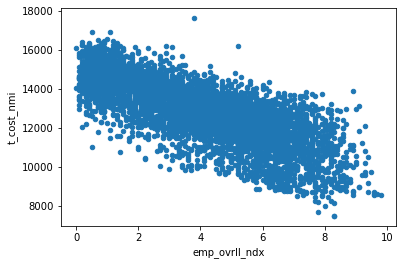

In [39]:
df.plot(kind='scatter', x='emp_ovrll_ndx', y='t_cost_nmi')

## Again, not much of a difference bewteen t_cost_ami, t_cost_80ami, and t_cost_nmi. The trend/relationship is the same.